In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from utils import preprocess

In [2]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
preprocess.print_hello_world()

Hello world!


In [4]:
DATA_DIR = 'data/'
IMG_DIR = 'img/'
TRAIN_FILE = DATA_DIR + 'train.csv'
TEST_FILE = DATA_DIR + 'train.csv'
AUX_DATA_DIR = DATA_DIR + 'auxiliary-data/'

In [5]:
df_train_original = pd.read_csv(TRAIN_FILE)
df_train_original.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


# Latitude & Longitude

In [6]:
lat_array = df_train_original['lat'].to_numpy()
lng_array = df_train_original['lng'].to_numpy()

In [7]:
print('Min latitude is', lat_array.min())
print('Max latitude is', lat_array.max())
print('Min longitude is', lng_array.min())
print('Max longitude is', lng_array.max())

Min latitude is 1.23962095
Max latitude is 69.4867678
Min longitude is -77.0653642528485
Max longitude is 121.0232316


In [ ]:
# preprocess.save_geo_scatter_plot(lat_array, lng_array, IMG_DIR + 'geo_coordinates_density_plot_pre.png')

### Geo Coordinates Density Scattor Plot Pre

<img src="img/geo_coordinates_density_plot_pre.png">

**After inspecting latitude and longitude, we find some properties have abnormal locations.**

In [9]:
lat_mask_global = df_train_original['lat'] > 1.5
lng_mask_global = (df_train_original['lng'] > 105) | (df_train_original['lng'] < 103)
df_train_abnormal_geo_location = df_train_original[lat_mask_global & lng_mask_global]
list(df_train_abnormal_geo_location['property_name'].unique())

['1953', 'pollen & bleu', 'ness', 'm5']

**There are only four properties with wrong geo location, hence we will do a manual lookup in Google Maps to correct them.**

In [10]:
preprocess.fix_abnormal_geo_location(df_train_original)

In [11]:
print('latitude error', (df_train_original['lat'] > 1.5).sum())
print('longitude error', ((df_train_original['lng'] > 105) | (df_train_original['lng'] < 103)).sum())

latitude error 0
longitude error 0


In [12]:
new_lat_array = df_train_original['lat'].to_numpy()
new_lng_array = df_train_original['lng'].to_numpy()

Stacking data...
Calculating kernel density...


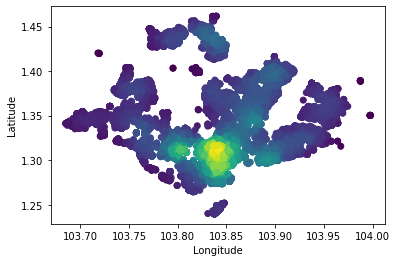

In [13]:
# preprocess.save_geo_scatter_plot(new_lat_array, new_lng_array, IMG_DIR + 'geo_coordinates_density_plot_post.png')

### Geo Coordinates Density Scattor Plot Post

<img src="img/geo_coordinates_density_plot_post.png">

# Subzone

In [14]:
print('Number of NA subzone records:', df_train_original['subzone'].isna().sum())

Number of NA subzone records: 113


In [15]:
preprocess.map_subzone_by_geo_location_knn(df_train_original)

In [16]:
print('After preprocess, number of NA subzone records:', df_train_original['subzone'].isna().sum())

After preprocess, number of NA subzone records: 0
